In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

#option for seeing all columns

#pd.set_option('max_column')

In [3]:
df = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [4]:
#checking basic info about dataset
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [9]:
#Changing data types [Cleaning data]
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format='%m/%d/%Y')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [10]:
#Checking if our dataset have null values
df.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [11]:
#checking duplicates
df.duplicated().sum()

0

In [12]:
# Checking if TotalDistance and TrackerDistance have a same values 
count_matches = 0
for index, (total_distance, tracker_distance) in enumerate(zip(df['TotalDistance'], df['TrackerDistance'])):
    if total_distance == tracker_distance:
        count_matches += 1
        
print("Count of matches:", count_matches)

Count of matches: 925


Mostly records are exactly the same but 15 records are different 940 != 925 (Why they are different though?)

Checking if LoggedActivitiesDistance,
VeryActiveDistance, ModeratelyActiveDistance, 
LightActiveDistance, SedentaryActiveDistance
are a sum for Tracker Distance (lets see)

In [13]:
sumofmatches = 0
for index, (loggedactivites, activedistance,moderatelydistance,lightdistance,sedentarydistance,tracker_distance) in enumerate(zip(df['LoggedActivitiesDistance'], df['VeryActiveDistance'],df['ModeratelyActiveDistance'],
                 df['LightActiveDistance'],df['SedentaryActiveDistance'],df['TrackerDistance'])):
    if loggedactivites + activedistance + moderatelydistance+ lightdistance+ sedentarydistance ==tracker_distance:
        sumofmatches += 1
print(f'Matches of count: {sumofmatches}') 

Matches of count: 304


As we can see sum of all related(?) columns gives us 304 same results as TrackerDistance

In [14]:
#Lets make a new column
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [15]:
df.query('distance_diff > 0.0').tail(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
731,7007744171,2016-05-02,13041,9.18,8.72,2.832326,4.64,0.70,3.83,0.0,64,14,250,1112,2642,0.46
732,7007744171,2016-05-03,14510,10.87,9.71,4.912368,4.48,1.02,5.36,0.0,58,31,330,1021,2976,1.16
734,7007744171,2016-05-05,15010,11.10,10.04,4.878232,4.33,1.29,5.48,0.0,53,23,317,1047,2933,1.06


In [16]:
df.query('distance_diff == 0.0').head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0


As we can see LoggedActivitiesDistance when is 0.0 our distance_diff also is 0.0 but when its > 0.0 distance_diff also change to higher value

 Its telling us that these two columns TotalDistance != TrackerDistance are not the same 

In [17]:
#Changing columns format 
df.columns = df.columns.str.title()

In [18]:
df.columns

Index(['Id', 'Activitydate', 'Totalsteps', 'Totaldistance', 'Trackerdistance',
       'Loggedactivitiesdistance', 'Veryactivedistance',
       'Moderatelyactivedistance', 'Lightactivedistance',
       'Sedentaryactivedistance', 'Veryactiveminutes', 'Fairlyactiveminutes',
       'Lightlyactiveminutes', 'Sedentaryminutes', 'Calories',
       'Distance_Diff'],
      dtype='object')

In [19]:
df.rename(columns={ 'Activitydate': 'Activity_Date', 'Totalsteps': 'Total_Steps', 
                   'Totaldistance': 'Total_Distance', 'Trackerdistance': 'Tracker_Distance',
                   'Loggedactivitiesdistance': 'Logged_Activities_Distance', 'Veryactivedistance': 'Very_Active_Distance',
                   'Moderatelyactivedistance': 'Moderately_Active_Distance', 'Lightactivedistance': 'Light_Active_Distance',
                   'Sedentaryactivedistance': 'Sedentary_Active_Distance', 'Veryactiveminutes': 'Very_Active_Minutes', 
                   'Fairlyactiveminutes': 'Fairly_Active_Minutes', 'Lightlyactiveminutes': 'Lightly_Active_Minutes', 
                   'Sedentaryminutes': 'Sedentary_Minutes'}, 
          inplace=True)


In [20]:
df.columns

Index(['Id', 'Activity_Date', 'Total_Steps', 'Total_Distance',
       'Tracker_Distance', 'Logged_Activities_Distance',
       'Very_Active_Distance', 'Moderately_Active_Distance',
       'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Calories',
       'Distance_Diff'],
      dtype='object')

In [21]:
df['Day_of_the_week'] = df['Activity_Date'].dt.day_name()
df['Number_of_week'] = df['Activity_Date'].dt.weekday

In [22]:
df_subset = df[['Id', 'Activity_Date', 'Total_Steps', #'Total_Distance',
       #'Tracker_Distance', 'Logged_Activities_Distance',
       #'Very_Active_Distance', 'Moderately_Active_Distance',
       #'Light_Active_Distance', 'Sedentary_Active_Distance',
       'Very_Active_Minutes', 'Fairly_Active_Minutes',
       'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Calories']]

In [23]:
df_subset.head(3)

,Id,Activity_Date,Total_Steps,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Calories
0,1503960366,2016-04-12,13162,25,13,328,728,1985
1,1503960366,2016-04-13,10735,21,19,217,776,1797
2,1503960366,2016-04-14,10460,30,11,181,1218,1776


In [24]:
#Average quantity of steps doing by each customer
avg_steps = df['Total_Steps']

avg_steps.mean().round(2)

7637.91

In [25]:
#lets see difference by avg to every day from monday to sunday in steps
df_subset['Day_of_the_week'] = df['Activity_Date'].dt.day_name()
df_subset['Number_of_week'] = df['Activity_Date'].dt.weekday

/tmp/ipykernel_19/2777392361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Day_of_the_week'] = df['Activity_Date'].dt.day_name()
/tmp/ipykernel_19/2777392361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Number_of_week'] = df['Activity_Date'].dt.weekday


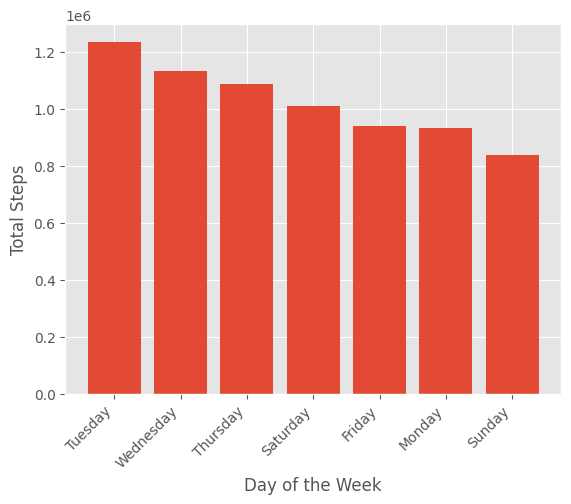

In [26]:

df_sorted = df_subset.groupby('Day_of_the_week')['Total_Steps'].sum().sort_values(ascending=False)
plt.bar(df_sorted.index, df_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.show()


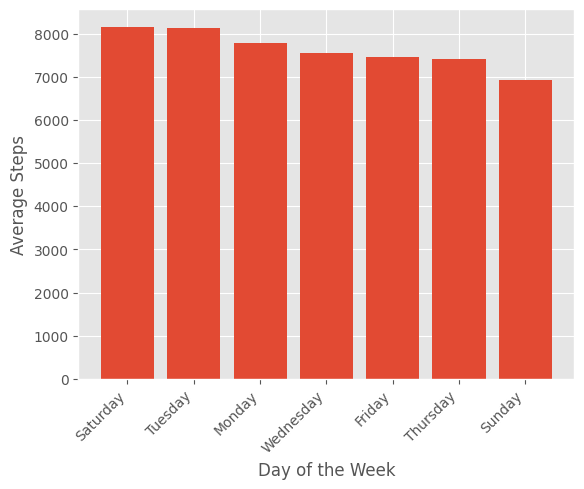

In [27]:

df_sorted = df_subset.groupby('Day_of_the_week')['Total_Steps'].mean().sort_values(ascending=False)
plt.bar(df_sorted.index, df_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Day of the Week')
plt.ylabel('Average Steps')
plt.show()


As we can see total steps and average steps are not equal by day of the week
This can mean that its depends not only in day of the week but also in week, holidays or by season

Medical News Today cite: ,,For general fitness, most adults should aim for 10,000 steps per day, with fewer than 5,000 steps being a sign of a sedentary lifestyle."

In [28]:
#Lets see how many times our customers did > 10 000steps in week and which day of the week this was
df_over_10k = df_subset[df_subset['Total_Steps'] >= 10000]
result = df_over_10k.groupby(['Id', 'Day_of_the_week']).size().unstack(fill_value=0)
print(result.sum())

Day_of_the_week
Friday       33
Monday       40
Saturday     42
Sunday       33
Thursday     46
Tuesday      60
Wednesday    49
dtype: int64


as we can see Tuesday is the wealthiest day of the week for our customers and total_steps are correct in that!

In [29]:
#Now lets see changing of active in minutes by some time 